Project 1


In [2]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns


In [19]:
api_key = 'aXE5dRMGg3PRe4QB2QrC'
import plotly
import plotly.plotly as py
#from plotly.graph_objs import *
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='vinothini21', api_key=api_key)

In [4]:
#Reading the Air_quality csv file

air_quality_data = os.path.join('Data Sets',"Air_Quality_data_state.csv")
air_quality_df = pd.read_csv(air_quality_data, skipinitialspace = True, low_memory=False)
air_quality_df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [5]:
# Renaming the columns to make it simpler
renamed_df = air_quality_df.rename(columns={"StateName":"State",
                                        
                                            "ReportYear":"Year"})
renamed_df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,State,CountyFips,CountyName,Year,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1097,Mobile,1999,32.0,No Units,No Units,Monitor Only,1


In [6]:
#Converting the needed columns to a dataframe
imp_col = renamed_df[["State", 'Year', "Value"]]
imp_col1 = renamed_df[["State", "Value"]]

In [7]:
#Grouping the data by State and finding the mean of the Air Quality Index
data_grouped1 = imp_col1.groupby(['State']).mean().astype(int)/100000
data_grouped1 = data_grouped1.reset_index()
data_grouped1.head()

,State,Value
0,Alabama,2.52399
1,Alaska,2.12128
2,Arizona,24.43865
3,Arkansas,0.49399
4,California,106.43663


In [8]:
#Average Air quality index by state
data_grouped = imp_col.groupby(['State', 'Year']).mean().astype(int)/100000
data_grouped.reset_index().head()

,State,Year,Value
0,Alabama,1999,23.19224
1,Alabama,2000,17.20400
2,Alabama,2001,2.87792
3,Alabama,2002,2.97879
4,Alabama,2003,2.04432


In [9]:
#Vulnerable properties and environment health
vul_pops_and_env_data = os.path.join('Data Sets', "VUNERABLEPOPSANDENVHEALTH.csv")
vul_pops_and_env_df = pd.read_csv(vul_pops_and_env_data, skipinitialspace = True)
vul_pops_and_env_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,...,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,EH_Time_Span_Start,EH_Time_Span_End,No.of years,Toxic_chem_per_year
0,1,1,Autauga,Alabama,AL,29,6690,774,1727,2680,...,1,1,1,1,1,1,1999,2003,4,720799.250000
1,1,3,Baldwin,Alabama,AL,16,20254,2533,4933,9354,...,1,1,1,2,1,1,2001,2003,2,17832.000000
2,1,5,Barbour,Alabama,AL,51,6729,569,1302,1618,...,1,1,1,1,1,1,1999,2003,4,12468.500000
3,1,7,Bibb,Alabama,AL,42,5355,358,900,1218,...,1,1,1,1,1,1,1994,2003,9,811.333333
4,1,9,Blount,Alabama,AL,28,11181,819,2217,3164,...,1,1,1,1,1,1,1999,2003,4,222255.000000


In [10]:
#Renaming column names
renamed_vul_pops_df = vul_pops_and_env_df.rename(columns={"CHSI_State_Name":"State",
                                                         "Toxic_chem_per_year":"Toxic_chem",
                                                         "CHSI_State_Abbr": "code"})
renamed_vul_pops_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,State,code,Strata_ID_Number,No_HS_Diploma,Unemployed,Sev_Work_Disabled,Major_Depression,...,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,EH_Time_Span_Start,EH_Time_Span_End,No.of years,Toxic_chem
0,1,1,Autauga,Alabama,AL,29,6690,774,1727,2680,...,1,1,1,1,1,1,1999,2003,4,720799.250000
1,1,3,Baldwin,Alabama,AL,16,20254,2533,4933,9354,...,1,1,1,2,1,1,2001,2003,2,17832.000000
2,1,5,Barbour,Alabama,AL,51,6729,569,1302,1618,...,1,1,1,1,1,1,1999,2003,4,12468.500000
3,1,7,Bibb,Alabama,AL,42,5355,358,900,1218,...,1,1,1,1,1,1,1994,2003,9,811.333333
4,1,9,Blount,Alabama,AL,28,11181,819,2217,3164,...,1,1,1,1,1,1,1999,2003,4,222255.000000


In [11]:
#Pulling the needed column to a dataframe
imp_vul_pops_col1 = renamed_vul_pops_df[["State", "Toxic_chem", "Major_Depression", "code"]]
imp_vul_pops_col1.head()

,State,Toxic_chem,Major_Depression,code
0,Alabama,720799.250000,2680,AL
1,Alabama,17832.000000,9354,AL
2,Alabama,12468.500000,1618,AL
3,Alabama,811.333333,1218,AL
4,Alabama,222255.000000,3164,AL


In [12]:
#Grouping by State and state abr
data_grouped3 = imp_vul_pops_col1.groupby(['State', 'code']).mean().astype(int).reset_index()
#final1_df = data_grouped3.set_index("State")
#final1_df.head().reset_index()

In [13]:
#Getting only the state and Toxic chemical
imp_vul_pops_col = renamed_vul_pops_df[["State", "Toxic_chem"]]
imp_vul_pops_col.head()

,State,Toxic_chem
0,Alabama,720799.250000
1,Alabama,17832.000000
2,Alabama,12468.500000
3,Alabama,811.333333
4,Alabama,222255.000000


In [14]:
#Average chemical release by state 
data_grouped2 = imp_vul_pops_col.groupby(['State']).mean().astype(int).reset_index()
data_grouped2.head()

,State,Toxic_chem
0,Alabama,628887
1,Alaska,2513699
2,Arizona,1210822
3,Arkansas,143740
4,California,398339


In [15]:
#Finding any correlation between the Air quality index and chemical release
data_merged = pd.merge(data_grouped1,data_grouped2, on="State", how='outer')
final_df = data_merged.set_index("State")
final_df.head()

,Value,Toxic_chem
State,,
Alabama,2.52399,628887
Alaska,2.12128,2513699
Arizona,24.43865,1210822
Arkansas,0.49399,143740
California,106.43663,398339


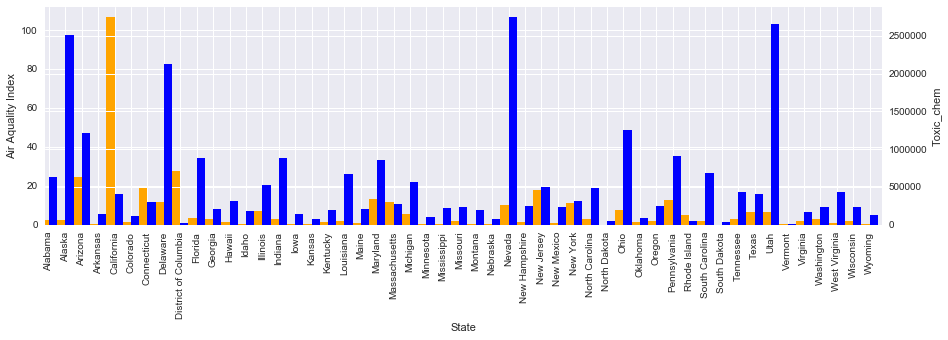

In [85]:
# Create matplotlib figure
fig = plt.figure(figsize=(15,4))

# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

width = 0.5

final_df.Value.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
final_df.Toxic_chem.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Air Aquality Index')
ax2.set_ylabel('Toxic_chem')

fig.savefig('air_quality_vs_toxic_chem.png', dpi=fig.dpi)
plt.show()

In [17]:
#Finding the top 4 state for toxic chemical release
Toxic_chem_max_4 = final_df.nlargest(4, 'Toxic_chem')
Toxic_chem_max_4

,Value,Toxic_chem
State,,
Nevada,10.16434,2743319
Utah,6.37621,2658792
Alaska,2.12128,2513699
Delaware,11.64606,2129802


In [75]:
# Create traces to plot the toxic chemical release
state = data_grouped3["State"]
toxic = data_grouped3["Toxic_chem"]

trace0 = go.Scatter(
    x = state,
    y = toxic,
    fill='tozerox',
    fillcolor='rgba(0,176,246,0.2)',
    line=Line(color='rgb(200,100,200)'),
    mode = 'lines+markers',
    name = 'lines+markers'
    
)

layout = dict(title = "Average Toxic Chemicals Release Every Year by State", 
              xaxis = dict(title = "State"), 
              yaxis = dict (title = "Average toxic chemical release per year"),
              colorway='Portland')
data = [trace0]
fig = dict(data = data , layout = layout)
py.iplot(fig, filename='toxic chemical release')

https://www.forbes.com/sites/priceonomics/2017/11/07/the-most-and-least-toxic-places-in-america/#20c9e46b4ac1

https://www.deseretnews.com/article/900003785/utah-among-the-most-toxic-states-report-says.html

In [21]:
list(data_grouped3)

['State', 'code', 'Toxic_chem', 'Major_Depression']

In [22]:
#dropping the toxic_chem col
data_depres_df = data_grouped3.drop(columns=['Toxic_chem'])

In [23]:
#Finding the top 3 depressed state
depressed_state_max_4 = data_depres_df.nlargest(4, 'Major_Depression').set_index("State")
depressed_state_max_4

,code,Major_Depression
State,,
District of Columbia,DC,39452
California,CA,31407
Connecticut,CT,30706
Massachusetts,MA,27371


In [24]:
#Finding the happy state
happy_state_max_3 = data_depres_df.nsmallest(3, 'Major_Depression').set_index("State")
happy_state_max_3

,code,Major_Depression
State,,
South Dakota,SD,649
North Dakota,ND,688
Nebraska,NE,1128


In [25]:
#Plotting the Depressed & happy state in plotly 
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,107)'],[1.0, 'rgb(44,39,43)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data_grouped3['code'],
        z = data_grouped3['Major_Depression'].astype(int),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Depression")
        ) ]

layout = dict(
        title = 'Depression by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(250, 250, 250)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='Depression data map')

In [26]:
data_merged1 = pd.merge(data_grouped1,data_grouped3, on="State", how='outer')

final2_df = data_merged.set_index("State")
final2_df.head()

,Value,Toxic_chem
State,,
Alabama,2.52399,628887
Alaska,2.12128,2513699
Arizona,24.43865,1210822
Arkansas,0.49399,143740
California,106.43663,398339


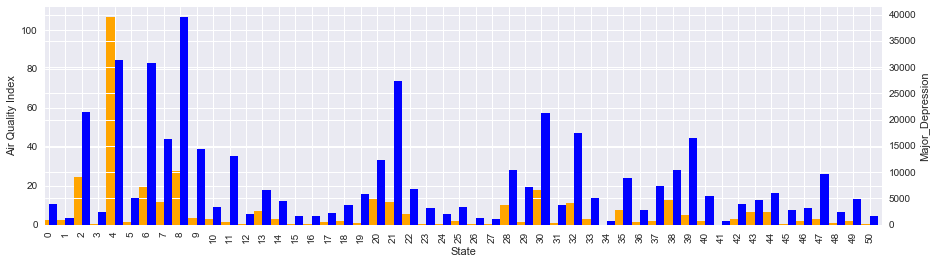

In [86]:
#Correlation between Air quality and Depression
sns.set()
# Create matplotlib figure
fig = plt.figure(figsize=(15,4))

# Create matplotlib axes
ax = fig.add_subplot(111) 

# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

width = 0.5

final2_df.Value.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
data_grouped3.Major_Depression.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Air Quality Index')
ax2.set_ylabel('Major_Depression')
fig.savefig('Air_Quality_Vs_Depression.png', dpi=fig.dpi)
plt.show()

In [28]:
#Reading the health data csv
health_data = os.path.join('Data Sets',"SUMMARYMEASURESOFHEALTH.csv")
health_df = pd.read_csv(health_data, skipinitialspace = True)
health_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
0,1,1,Autauga,Alabama,AL,29,74.9,74.5,78.0,76.5,...,22.8,17.1,15.5,28.2,7.5,4.0,8.8,6,5.4,9.7
1,1,3,Baldwin,Alabama,AL,16,76.6,75.5,78.2,76.5,...,20.4,17.1,12.4,18.3,6.7,5.6,7.4,6,5.7,7.7
2,1,5,Barbour,Alabama,AL,51,74.5,72.3,77.3,76.5,...,31.7,17.1,13.2,29.6,-1111.1,5.5,8.0,6,-1111.1,-1111.1
3,1,7,Bibb,Alabama,AL,42,73.2,73.3,77.8,76.5,...,29.3,17.1,10.1,28.7,-1111.1,4.7,8.2,6,-1111.1,-1111.1
4,1,9,Blount,Alabama,AL,28,76.1,74.9,79.4,76.5,...,24.6,17.1,19.6,32.1,7.9,4.2,7.8,6,6.0,9.8


In [29]:
#Finding the missing values
health_df[health_df["ALE"] == -2222.2]

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,ALE,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
87,2,232,Skagway-Hoonah-Angoon,Alaska,AK,80,-2222.2,-2222.2,-2222.2,-2222.2,...,23.1,17.1,-1111.1,-1111.1,-1111.1,3.4,7.4,6,-1111.1,-1111.1
92,2,282,Yakutat,Alaska,AK,78,-2222.2,-2222.2,-2222.2,-2222.2,...,21.2,17.1,-1111.1,-1111.1,-1111.1,3.2,7.5,6,-1111.1,-1111.1


In [30]:
#Replacing the missing values as NaN
health_df["ALE"].replace(-2222.2, np.NaN, inplace=True)

In [31]:
#Renaming the desired columns
renamed_health_df = health_df.rename(columns={"CHSI_State_Name":"State",
                                                         "ALE":"Average_Life_Expectancy"})
renamed_health_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,State,CHSI_State_Abbr,Strata_ID_Number,Average_Life_Expectancy,Min_ALE,Max_ALE,US_ALE,...,Max_Health_Status,US_Health_Status,CI_Min_Health_Status,CI_Max_Health_Status,Unhealthy_Days,Min_Unhealthy_Days,Max_Unhealthy_Days,US_Unhealthy_Days,CI_Min_Unhealthy_Days,CI_Max_Unhealthy_Days
0,1,1,Autauga,Alabama,AL,29,74.9,74.5,78.0,76.5,...,22.8,17.1,15.5,28.2,7.5,4.0,8.8,6,5.4,9.7
1,1,3,Baldwin,Alabama,AL,16,76.6,75.5,78.2,76.5,...,20.4,17.1,12.4,18.3,6.7,5.6,7.4,6,5.7,7.7
2,1,5,Barbour,Alabama,AL,51,74.5,72.3,77.3,76.5,...,31.7,17.1,13.2,29.6,-1111.1,5.5,8.0,6,-1111.1,-1111.1
3,1,7,Bibb,Alabama,AL,42,73.2,73.3,77.8,76.5,...,29.3,17.1,10.1,28.7,-1111.1,4.7,8.2,6,-1111.1,-1111.1
4,1,9,Blount,Alabama,AL,28,76.1,74.9,79.4,76.5,...,24.6,17.1,19.6,32.1,7.9,4.2,7.8,6,6.0,9.8


In [32]:
#Groupping and taking average 
imp_health = renamed_health_df[["State", "Average_Life_Expectancy"]]
data_grouped4 = imp_health.groupby(['State']).mean().astype(int).reset_index()
data_grouped4.head()


,State,Average_Life_Expectancy
0,Alabama,74
1,Alaska,76
2,Arizona,77
3,Arkansas,74
4,California,77


In [33]:
#Merging the two data sets(toxic chem and average life expectancy)
data_merged4 = pd.merge(data_grouped3,data_grouped4, on="State", how='outer')
final4_df = data_merged4.set_index("State")
final4_df.head()

,code,Toxic_chem,Major_Depression,Average_Life_Expectancy
State,,,,
Alabama,AL,628887,3825,74
Alaska,AK,2513699,1271,76
Arizona,AZ,1210822,21471,77
Arkansas,AR,143740,2353,74
California,CA,398339,31407,77


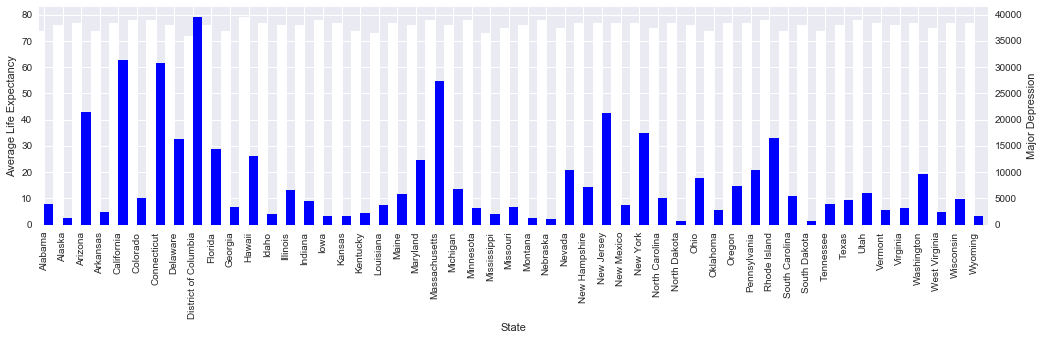

In [87]:
#Plotting the depression and life expectancy
sns.set()
# Create matplotlib figure
fig = plt.figure(figsize=(17,4))
# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

width = 0.5

final4_df.Average_Life_Expectancy.plot(kind='bar', color='white', ax=ax, width=width, position=1)
final4_df.Major_Depression.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('Average Life Expectancy')
ax2.set_ylabel('Major Depression')

fig.savefig('Depression_vs_life_expectancy.png', dpi=fig.dpi)
plt.show()

In [35]:
#Reading the risk factor csv
risk_factor_data = os.path.join('Data Sets',"RISKFACTORSANDACCESSTOCARE.csv")
risk_factor_df = pd.read_csv(risk_factor_data, skipinitialspace = True)
risk_factor_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [38]:
#Pulling the two columns which is interesting
imp_risk_factor = risk_factor_df[["CHSI_State_Name", "No_Exercise", "Obesity"]]
imp_risk_factor["No_Exercise"].replace(-1111.1, np.NaN, inplace=True)
imp_risk_factor["Obesity"].replace(-1111.1, np.NaN, inplace=True)
imp_risk_factor.head()


/Users/vinu/anaconda3/envs/pythonData/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,CHSI_State_Name,No_Exercise,Obesity
0,Alabama,27.8,24.5
1,Alabama,27.2,23.6
2,Alabama,NaN,25.6
3,Alabama,NaN,NaN
4,Alabama,33.5,24.2


In [39]:
#Taking total no of people based on category
data_grouped5 = imp_risk_factor.groupby(['CHSI_State_Name']).sum()
data_grouped5.head()

,No_Exercise,Obesity
CHSI_State_Name,,
Alabama,1191.8,1102.8
Alaska,0.0,0.0
Arizona,355.0,313.3
Arkansas,2000.9,1698.6
California,811.9,763.5


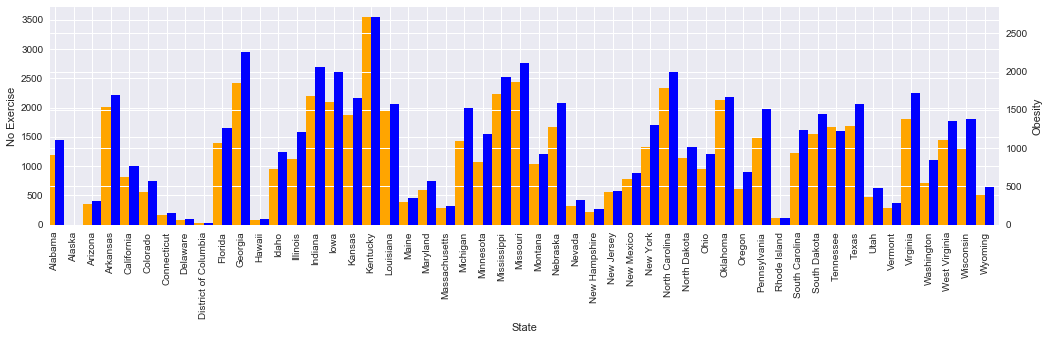

In [88]:
#Plotting No exercise with obesity
sns.set()
# Create matplotlib figure
fig = plt.figure(figsize=(17,4))
# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx() 

width = 0.5

data_grouped5.No_Exercise.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
data_grouped5.Obesity.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('State')
ax.set_ylabel('No Exercise')
ax2.set_ylabel('Obesity')

fig.savefig('Obesity_vs_no_exercise.png', dpi=fig.dpi)
plt.show()

In [41]:
#Finding the top 3 states with obesity
obesity_max_3 = data_grouped5.nlargest(3, 'Obesity')
obesity_max_3

,No_Exercise,Obesity
CHSI_State_Name,,
Kentucky,3538.7,2706.2
Georgia,2412.1,2261.1
Missouri,2430.5,2112.7


In [42]:
#Finding the top 3 states with no exercise
No_exer_max_3 = data_grouped5.nlargest(3, 'No_Exercise')
No_exer_max_3

,No_Exercise,Obesity
CHSI_State_Name,,
Kentucky,3538.7,2706.2
Missouri,2430.5,2112.7
Georgia,2412.1,2261.1


In [43]:
#Replacing the missing values for smoker & high blood pressure
risk_factor_df["Smoker"].replace(-1111.1, np.NaN, inplace=True)
risk_factor_df["High_Blood_Pres"].replace(-1111.1, np.NaN, inplace=True)

In [44]:
#Extracting the imp columns from risk data
imp_smoker_data = risk_factor_df[["CHSI_State_Name", "Smoker", "High_Blood_Pres"]]
imp_smoker_data1 = imp_smoker_data.rename(columns={"CHSI_State_Name" : "State"})
imp_smoker_data1.head()

,State,Smoker,High_Blood_Pres
0,Alabama,26.6,29.1
1,Alabama,24.6,30.5
2,Alabama,17.7,NaN
3,Alabama,NaN,NaN
4,Alabama,23.6,NaN


In [45]:
#Grouping by state and finding the total no. of people
data_grouped7 = imp_smoker_data1.groupby(['State']).sum().reset_index()
data_grouped7.head()

,State,Smoker,High_Blood_Pres
0,Alabama,1143.5,758.4
1,Alaska,0.0,0.0
2,Arizona,279.7,327.9
3,Arkansas,1780.5,921.7
4,California,601.2,702.3


In [46]:
#Finding the top 10 
smoker_max_10 = data_grouped7.nlargest(10, 'Smoker')
smoker_max_10

,State,Smoker,High_Blood_Pres
17,Kentucky,3047.1,1792.8
10,Georgia,2279.1,1113.2
14,Indiana,2162.1,1106.0
25,Missouri,2098.4,946.2
33,North Carolina,2031.8,1444.7
15,Iowa,1902.8,2075.6
3,Arkansas,1780.5,921.7
24,Mississippi,1755.5,1016.7
36,Oklahoma,1720.9,1610.2
46,Virginia,1586.8,1568.8


In [47]:
#Finding the top 10 
High_blood_pres_max_10 = data_grouped7.nlargest(10, 'High_Blood_Pres')
High_blood_pres_max_10

,State,Smoker,High_Blood_Pres
15,Iowa,1902.8,2075.6
17,Kentucky,3047.1,1792.8
36,Oklahoma,1720.9,1610.2
46,Virginia,1586.8,1568.8
33,North Carolina,2031.8,1444.7
42,Tennessee,1405.0,1443.6
41,South Dakota,1231.9,1435.8
18,Louisiana,1429.0,1153.5
9,Florida,1223.8,1124.3
10,Georgia,2279.1,1113.2


In [84]:
#Plotting High blood pressure vs smokers
z=data_grouped7["Smoker"]
trace1 = go.Scatter3d(
    x=data_grouped7["Smoker"],
    y=data_grouped7["Smoker"],
    z=data_grouped7["High_Blood_Pres"],
    mode='markers',
    marker=dict(
        size=12, 
        color =z,               # set color to an array/list of desired values
        colorscale='Rainbow',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = dict(title = 'Smoking vs High Blood Pressure',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Temperature (degrees F)'),
              )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-smoker vs high BP')